In [1]:
import json
import requests
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from config import api_key
from citipy import citipy
import time

url = "http://api.openweathermap.org/data/2.5/weather?"

In [2]:
data = json.load(open("current.city.list.json", encoding="utf8"))
data_df = pd.DataFrame(data)
data_df.dropna()

sample_data_df = data_df.sample(n=500, axis=0)
sample_data_df.head()

,coord,country,geoname,id,langs,name,stat,stations,zoom
20220,"{'lon': -77.373306, 'lat': 37.608761}",US,"{'cl': 'P', 'code': 'PPL', 'parent': 4762988}",4772566.0,[{'link': 'http://en.wikipedia.org/wiki/Mechan...,Mechanicsville,"{'level': 1.0, 'population': 36348}","[{'id': 2871, 'dist': 49, 'kf': 1}, {'id': 287...",10.0
14952,"{'lon': 19.49292, 'lat': 49.88335}",PL,"{'cl': 'P', 'code': 'PPLA2', 'parent': 7533264}",3082722.0,NaN,Wadowice,"{'level': 1.0, 'population': 19238}","[{'id': 5352, 'dist': 29, 'kf': 1}, {'id': 106...",11.0
9273,"{'lon': 138.181107, 'lat': 36.65139}",JP,"{'cl': 'P', 'code': 'PPLA', 'parent': 1856210}",1856215.0,NaN,Nagano-shi,"{'level': 1.0, 'population': 360176}","[{'id': 9237, 'dist': 2, 'kf': 1}]",8.0
14326,"{'lon': 2.48333, 'lat': 48.833328}",FR,"{'cl': 'P', 'code': 'PPLA3', 'parent': 6452026}",2990265.0,[{'link': 'http://en.wikipedia.org/wiki/Nogent...,Nogent-sur-Marne,"{'level': 1.0, 'population': 31236}","[{'id': 5610, 'dist': 15, 'kf': 1}, {'id': 561...",14.0
12844,"{'lon': 5.28889, 'lat': 51.880829}",NL,"{'cl': 'P', 'code': 'PPL', 'parent': 2755632}",2755633.0,"[{'de': 'Geldermalsen'}, {'en': 'Geldermalsen'...",Geldermalsen,"{'level': 1.0, 'population': 25734}","[{'id': 5207, 'dist': 23, 'kf': 1}, {'id': 520...",11.0


In [3]:
lat=[]
long=[]

for index, row in sample_data_df.iterrows():
    lat.append(row[0]["lat"])
    long.append(row[0]["lon"])
    
sample_coord = list(zip(lat,long))
sample_coord_df = pd.DataFrame(sample_coord)
sample_coord_df.columns=["Lat", "Long"]
sample_coord_df.head()

,Lat,Long
0,37.608761,-77.373306
1,49.883350,19.492920
2,36.651390,138.181107
3,48.833328,2.483330
4,51.880829,5.288890


In [4]:
sample_coord_df["Temperature"]=""
sample_coord_df["Humidity"]=""
sample_coord_df["Cloudiness"]=""
sample_coord_df["Wind Speed"]=""

row_count=0

for index,row in sample_coord_df.iterrows():
    time.sleep(1)
   
    units="Imperial"
   
    query_url= url + "lat=" + str(row["Lat"])+ "&lon=" + str(row["Long"]) + "&appid=" + api_key + "&units=" + units
    
    print("Retrieving city #" + str(row_count))
    
    row_count+=1

    data_json = requests.get(query_url).json()
    
    try:
        temperature=data_json["main"]["temp"]
        sample_coord_df.set_value(index, "Temperature", temperature)
        
        humidity=data_json["main"]["humidity"]
        sample_coord_df.set_value(index, "Humidity", humidity)
        
        cloudiness=data_json["clouds"]["all"]
        sample_coord_df.set_value(index, "Cloudiness", cloudiness)
        
        wind_speed=data_json["wind"]["speed"]
        sample_coord_df.set_value(index, "Wind Speed", wind_speed)
        
    except:
        print("Error" + query_url)
        print(data)

Retrieving city #0


C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\brand\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Retrieving city #1
Retrieving city #2
Retrieving city #3
Retrieving city #4
Retrieving city #5
Retrieving city #6
Retrieving city #7
Retrieving city #8
Retrieving city #9
Retrieving city #10
Retrieving city #11
Retrieving city #12
Retrieving city #13
Retrieving city #14
Retrieving city #15
Retrieving city #16
Retrieving city #17
Retrieving city #18
Retrieving city #19
Retrieving city #20
Retrieving city #21
Retrieving city #22
Retrieving city #23
Retrieving city #24
Retrieving city #25
Retrieving city #26
Retrieving city #27
Retrieving city #28
Retrieving city #29
Retrieving city #30
Retrieving city #31
Retrieving city #32
Retrieving city #33
Retrieving city #34
Retrieving city #35
Retrieving city #36
Retrieving city #37
Retrieving city #38
Retrieving city #39
Retrieving city #40
Retrieving city #41
Retrieving city #42
Retrieving city #43
Retrieving city #44
Retrieving city #45
Retrieving city #46
Retrieving city #47
Retrieving city #48
Retrieving city #49
Retrieving city #50
Retrievin

Retrieving city #397
Retrieving city #398
Retrieving city #399
Retrieving city #400
Retrieving city #401
Retrieving city #402
Retrieving city #403
Retrieving city #404
Retrieving city #405
Retrieving city #406
Retrieving city #407
Retrieving city #408
Retrieving city #409
Retrieving city #410
Retrieving city #411
Retrieving city #412
Retrieving city #413
Retrieving city #414
Retrieving city #415
Retrieving city #416
Retrieving city #417
Retrieving city #418
Retrieving city #419
Retrieving city #420
Retrieving city #421
Retrieving city #422
Retrieving city #423
Retrieving city #424
Retrieving city #425
Retrieving city #426
Retrieving city #427
Retrieving city #428
Retrieving city #429
Retrieving city #430
Retrieving city #431
Retrieving city #432
Retrieving city #433
Retrieving city #434
Retrieving city #435
Retrieving city #436
Retrieving city #437
Retrieving city #438
Retrieving city #439
Retrieving city #440
Retrieving city #441
Retrieving city #442
Retrieving city #443
Retrieving ci

In [5]:
sample_coord_df.to_csv("weatherdata.csv", index=False)
sample_coord_df

,Lat,Long,Temperature,Humidity,Cloudiness,Wind Speed
0,37.608761,-77.373306,68.54,77,90,20.8
1,49.883350,19.492920,68.29,49,20,5.82
2,36.651390,138.181107,71.01,94,4,6.96
3,48.833328,2.483330,70.36,33,0,9.17
4,51.880829,5.288890,64.71,55,90,9.17
5,27.983330,79.733330,87.35,66,64,7.38
6,-6.170280,106.530281,81.09,69,20,6.93
7,51.886002,-0.520990,62.62,72,75,19.46
8,-3.607220,-38.968330,86,55,75,19.46
9,10.033330,105.783333,77,100,40,3.36


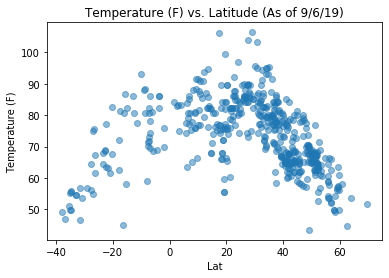

In [6]:
plt.scatter(sample_coord_df["Lat"], sample_coord_df["Temperature"], alpha=0.5)

plt.title("Temperature (F) vs. Latitude (As of 9/6/19)")
plt.xlabel("Lat")
plt.ylabel("Temperature (F)")
plt.savefig("TempvsLat.png")

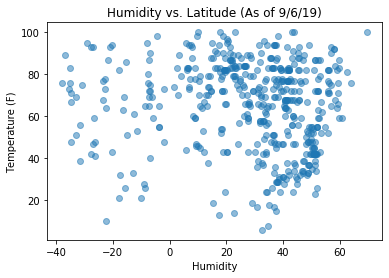

In [7]:
plt.scatter(sample_coord_df["Lat"], sample_coord_df["Humidity"], alpha=0.5)

plt.title("Humidity vs. Latitude (As of 9/6/19)")
plt.xlabel("Humidity")
plt.ylabel("Temperature (F)")
plt.savefig("HumidityvsLat.png")

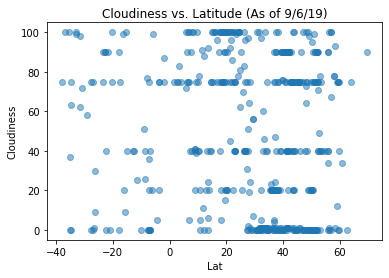

In [8]:
plt.scatter(sample_coord_df["Lat"], sample_coord_df["Cloudiness"], alpha=0.5)

plt.title("Cloudiness vs. Latitude (As of 9/6/19)")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.savefig("CloudsvsLat.png")

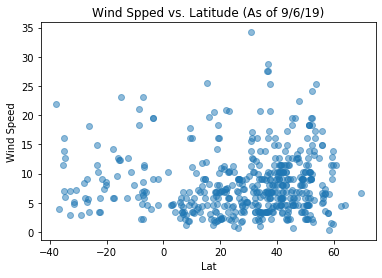

In [9]:
plt.scatter(sample_coord_df["Lat"], sample_coord_df["Wind Speed"], alpha=0.5)

plt.title("Wind Spped vs. Latitude (As of 9/6/19)")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.savefig("WindspeedvsLat.png")